In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Load data

In [2]:
df1= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_HuricaneMatthew/t01.csv')
df2= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_HuricaneMatthew/t02.csv')
df3= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_HuricaneMatthew/t03.csv')

In [3]:
#check and drop missing values
#replace entries for which building damage is missing with np.nan 

def clean_missing(df):
    
    df.drop(columns=['t0_mean_HTI_mat_prop_damage_3km',
                     't0_mean_dist2_DTMsites_km_Dec16Apr17',
                     't0_mean_sumDTM_IDPpop_3km_May17Sep17',
                     't0_mean_sumDTM_IDPpop_3km_Dec16Apr17'
                    ], inplace=True)
    
    df['t0_contact_locs'].apply(lambda x: x if x!= -999.00 else 0.0)
    
    
    if 't1_mean_HTI_mat_prop_damage_3km' in df.columns:
        df.drop(columns=['t1_mean_HTI_mat_prop_damage_3km',
                     't1_mean_dist2_DTMsites_km_Dec16Apr17',
                     't1_mean_sumDTM_IDPpop_3km_May17Sep17',
                     't1_mean_sumDTM_IDPpop_3km_Dec16Apr17',
                    't1_sum_idps_3km'
                    ], inplace=True)
        
        df['t1_contact_locs'].apply(lambda x: x if x!= -999.00 else 0.0)

    elif 't2_mean_HTI_mat_prop_damage_3km' in df.columns:
        df.drop(columns=['t2_mean_HTI_mat_prop_damage_3km',
                     't2_mean_dist2_DTMsites_km_Dec16Apr17',
                     't2_mean_sumDTM_IDPpop_3km_May17Sep17',
                     't2_mean_sumDTM_IDPpop_3km_Dec16Apr17',
                    't2_sum_idps_3km'], inplace=True)
        
        df['t2_contact_locs'].apply(lambda x: x if x!= -999.00 else 0.0)
        
    elif 't3_mean_HTI_mat_prop_damage_3km' in df.columns:
        df.drop(columns=['t3_mean_HTI_mat_prop_damage_3km',
                     't3_mean_dist2_DTMsites_km_Dec16Apr17',
                     't3_mean_sumDTM_IDPpop_3km_May17Sep17',
                     't3_mean_sumDTM_IDPpop_3km_Dec16Apr17',
                     't3_sum_idps_3km'
                    ], inplace=True)
        
        df['t3_contact_locs'].apply(lambda x: x if x!= -999.00 else 0.0)    
    #drop nan values
    df.dropna(inplace=True)    
    #drop duplicates
    df.drop_duplicates(inplace=True)
    #keep only one copy of IDPs with exact same combination of home location variables (to enable merging)
    df.drop_duplicates(subset=['t0_median_calls', 't0_rog', 't0_entropy_step', 't0_contact_locs',
       't0_known_locs', 't0_mean_HTI_mat_gust_footprint_3km',
       't0_mean_HTI_mat_prop_damage_3km_extrapdist',
       't0_mean_HTI_mat_rain3to5oct_mm_3km', 't0_mean_dist2_DTMsites_km_Nov16',
       't0_mean_dist2_mainroads_km', 't0_mean_dist2_urbancentres_km',
       't0_mean_popdensity3km_2015_UTM18N', 't0_mean_sumDTM_IDPpop_3km_Nov16'], inplace=True)
    
    df.reset_index(inplace=True)
    df.drop(columns='index', inplace=True)
    return df

In [4]:
df1, df2, df3= clean_missing(df1), clean_missing(df2), clean_missing(df3)

In [5]:
df_all = pd.merge(df1, df2, on=['t0_median_calls', 't0_rog', 't0_entropy_step', 't0_contact_locs',
       't0_known_locs', 't0_mean_HTI_mat_gust_footprint_3km',
       't0_mean_HTI_mat_prop_damage_3km_extrapdist',
       't0_mean_HTI_mat_rain3to5oct_mm_3km', 't0_mean_dist2_DTMsites_km_Nov16',
       't0_mean_dist2_mainroads_km', 't0_mean_dist2_urbancentres_km',
       't0_mean_popdensity3km_2015_UTM18N', 't0_mean_sumDTM_IDPpop_3km_Nov16'], how='inner')

In [6]:
df_all = pd.merge(df_all, df3, on=['t0_median_calls', 't0_rog', 't0_entropy_step', 't0_contact_locs',
       't0_known_locs', 't0_mean_HTI_mat_gust_footprint_3km',
       't0_mean_HTI_mat_prop_damage_3km_extrapdist',
       't0_mean_HTI_mat_rain3to5oct_mm_3km', 't0_mean_dist2_DTMsites_km_Nov16',
       't0_mean_dist2_mainroads_km', 't0_mean_dist2_urbancentres_km',
       't0_mean_popdensity3km_2015_UTM18N', 't0_mean_sumDTM_IDPpop_3km_Nov16'], how='inner')

In [7]:
df_all.drop(columns='t0_median_calls', inplace=True)

In [8]:
df_all.rename(columns={'dist_to_hl_x': 't1_dist_to_hl',
                  'dist_to_hl_y': 't2_dist_to_hl',
                  'dist_to_hl': 't3_dist_to_hl',
                  't0_mean_popdensity3km_2015_UTM18N':'t0_popdensity3km_2015',
                  't1_mean_popdensity3km_2015_UTM18N':'t1_popdensity3km_2015',
                  't2_mean_popdensity3km_2015_UTM18N':'t2_popdensity3km_2015',
                  't3_mean_popdensity3km_2015_UTM18N':'t3_popdensity3km_2015',
                  't0_mean_HTI_mat_gust_footprint_3km': 't0_wind_instensity',
                  't1_mean_HTI_mat_gust_footprint_3km': 't1_wind_instensity',
                  't2_mean_HTI_mat_gust_footprint_3km': 't2_wind_instensity',
                  't3_mean_HTI_mat_gust_footprint_3km': 't3_wind_instensity',
                  't0_mean_HTI_mat_rain3to5oct_mm_3km': 't0_rain_intensity',
                  't1_mean_HTI_mat_rain3to5oct_mm_3km': 't1_rain_intensity',
                  't2_mean_HTI_mat_rain3to5oct_mm_3km': 't2_rain_intensity',
                  't3_mean_HTI_mat_rain3to5oct_mm_3km': 't3_rain_intensity',
                  't0_mean_HTI_mat_prop_damage_3km_extrapdist': 't0_prop_damaged_buildings',
                  't1_mean_HTI_mat_prop_damage_3km_extrapdist': 't1_prop_damaged_buildings',
                  't2_mean_HTI_mat_prop_damage_3km_extrapdist': 't2_prop_damaged_buildings',
                  't3_mean_HTI_mat_prop_damage_3km_extrapdist': 't3_prop_damaged_buildings',
                  't0_mean_dist2_DTMsites_km_Nov16': 't0_dist2_DTMsites',
                  't1_mean_dist2_DTMsites_km_Nov16': 't1_dist2_DTMsites',
                  't2_mean_dist2_DTMsites_km_Nov16': 't2_dist2_DTMsites',
                  't3_mean_dist2_DTMsites_km_Nov16': 't3_dist2_DTMsites',
                  't0_mean_dist2_mainroads_km': 't0_dist2_mainroads',
                  't1_mean_dist2_mainroads_km': 't1_dist2_mainroads',
                  't2_mean_dist2_mainroads_km': 't2_dist2_mainroads',
                  't3_mean_dist2_mainroads_km': 't3_dist2_mainroads',
                  't0_mean_dist2_urbancentres_km': 't0_dist2_urbancentres',
                  't1_mean_dist2_urbancentres_km': 't1_dist2_urbancentres',
                  't2_mean_dist2_urbancentres_km': 't2_dist2_urbancentres',
                  't3_mean_dist2_urbancentres_km': 't3_dist2_urbancentres',
                  't0_mean_sumDTM_IDPpop_3km_Nov16': 't0_DTM_IDPpop',
                  't1_mean_sumDTM_IDPpop_3km_Nov16': 't1_DTM_IDPpop',
                  't2_mean_sumDTM_IDPpop_3km_Nov16': 't2_DTM_IDPpop',
                  't3_mean_sumDTM_IDPpop_3km_Nov16': 't3_DTM_IDPpop',
                      }, inplace=True)

In [9]:
cols_t0= df_all.columns[df_all.columns.str.startswith('t0')].tolist()
cols_t1= df_all.columns[df_all.columns.str.startswith('t1')].tolist()
cols_t2= df_all.columns[df_all.columns.str.startswith('t2')].tolist()
cols_t3= df_all.columns[df_all.columns.str.startswith('t3')].tolist()
cols= cols_t0 + cols_t1 + cols_t2 + cols_t3
df_all = df_all[cols]

In [10]:
for num, col in enumerate(df_all.columns):
    print(num, col)

0 t0_rog
1 t0_entropy_step
2 t0_contact_locs
3 t0_known_locs
4 t0_wind_instensity
5 t0_prop_damaged_buildings
6 t0_rain_intensity
7 t0_dist2_DTMsites
8 t0_dist2_mainroads
9 t0_dist2_urbancentres
10 t0_popdensity3km_2015
11 t0_DTM_IDPpop
12 t1_contact_locs
13 t1_known_locs
14 t1_wind_instensity
15 t1_prop_damaged_buildings
16 t1_rain_intensity
17 t1_dist2_DTMsites
18 t1_dist2_mainroads
19 t1_dist2_urbancentres
20 t1_popdensity3km_2015
21 t1_DTM_IDPpop
22 t1_dist_to_hl
23 t2_contact_locs
24 t2_known_locs
25 t2_wind_instensity
26 t2_prop_damaged_buildings
27 t2_rain_intensity
28 t2_dist2_DTMsites
29 t2_dist2_mainroads
30 t2_dist2_urbancentres
31 t2_popdensity3km_2015
32 t2_DTM_IDPpop
33 t2_dist_to_hl
34 t3_contact_locs
35 t3_known_locs
36 t3_wind_instensity
37 t3_prop_damaged_buildings
38 t3_rain_intensity
39 t3_dist2_DTMsites
40 t3_dist2_mainroads
41 t3_dist2_urbancentres
42 t3_popdensity3km_2015
43 t3_DTM_IDPpop
44 t3_dist_to_hl


### Descriptive Stats

#### Table

In [11]:
table= df_all.describe().transpose()
table = table.round(2)
table.reset_index(inplace=True)
table= table.rename(columns={'index': 'variable'})

In [12]:
table

,variable,count,mean,std,min,25%,50%,75%,max
0,t0_rog,5516.0,5.73,7.43,0.00,1.19,3.11,7.12,92.23
1,t0_entropy_step,5516.0,1.47,0.94,0.00,0.72,1.31,2.09,5.15
2,t0_contact_locs,5516.0,-20.59,144.04,-999.00,0.33,0.62,0.86,1.00
3,t0_known_locs,5516.0,0.50,0.27,0.01,0.27,0.51,0.72,1.00
4,t0_wind_instensity,5516.0,57.75,22.57,45.00,45.00,45.00,55.00,155.00
5,t0_prop_damaged_buildings,5516.0,0.10,0.13,0.05,0.05,0.05,0.05,0.75
6,t0_rain_intensity,5516.0,493.11,81.14,125.00,475.00,475.00,525.00,675.00
7,t0_dist2_DTMsites,5516.0,80.25,42.92,6.22,73.45,95.86,102.20,203.23
8,t0_dist2_mainroads,5516.0,7.19,12.82,0.09,0.82,2.15,6.16,61.44
9,t0_dist2_urbancentres,5516.0,7.49,15.02,0.46,0.46,1.06,7.16,72.91


#### Density Plot of Distance Travelled

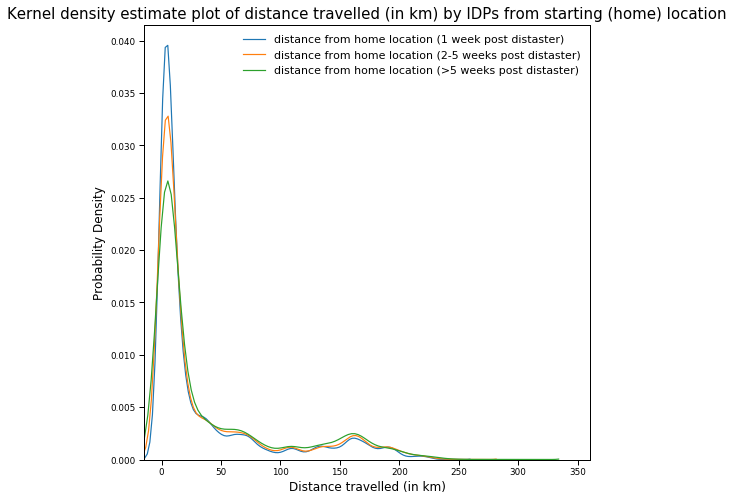

In [12]:
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":15,"axes.labelsize":12})   
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Kernel density estimate plot of distance travelled (in km) by IDPs from starting (home) location")
ax.set(xlabel='Distance travelled (in km)', ylabel='Probability Density')
sns.kdeplot(df_all['t1_dist_to_hl'], ax=ax, label='distance from home location (1 week post distaster)').set(xlim=(-15, max(df_all['t1_dist_to_hl'])+50))
sns.kdeplot(df_all['t2_dist_to_hl'], ax=ax, label='distance from home location (2-5 weeks post distaster)').set(xlim=(-15, max(df_all['t2_dist_to_hl'])+50))
sns.kdeplot(df_all['t3_dist_to_hl'], ax=ax, label='distance from home location (>5 weeks post distaster)').set(xlim=(-15, max(df_all['t3_dist_to_hl'])+50))
ax.legend(loc='upper right', frameon=False, fontsize=11)

In [13]:
figure = ax.get_figure()    
figure.savefig('disp_plot_hurricane.png', dpi=400)

#### Heatmaps

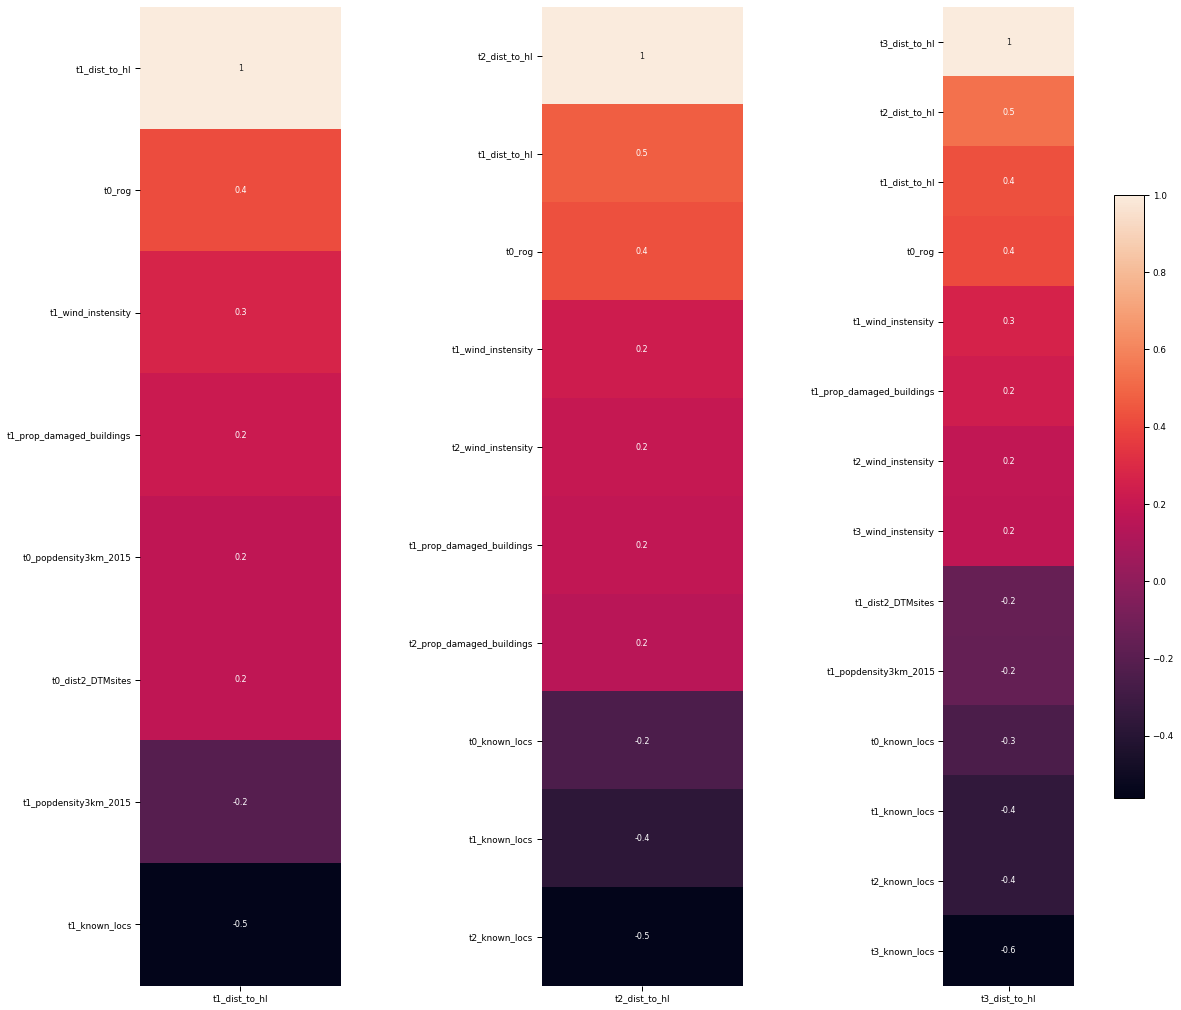

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 18))
fig.subplots_adjust(wspace=1)

#for distance travelled at time step 1
heat1_vars= df_all.iloc[:, 0:23]
heat1_vars= heat1_vars.replace('unknown', 0)

heat1_corr= heat1_vars.corr()
heat1_corr[np.abs(heat1_corr['t1_dist_to_hl'])<.15] = np.nan #setting low correlations to nan
heat1_corr.dropna(axis=0, inplace=True) #dropping low correlations variables

mask = np.zeros_like(heat1_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heat1_corr[['t1_dist_to_hl']].sort_values(by=['t1_dist_to_hl'],ascending=False), 
            annot=True, annot_kws={"size": 8}, fmt='.1g', ax=ax1, cbar=False)

#for distance travelled at time step 2
heat2_vars= df_all.iloc[:, 0:34]
heat2_vars= heat2_vars.replace('unknown', 0)

heat2_corr= heat2_vars.corr()
heat2_corr[np.abs(heat2_corr['t2_dist_to_hl'])<.15] = np.nan #setting low correlations to nan
heat2_corr.dropna(axis=0, inplace=True) #dropping low correlations variables

mask = np.zeros_like(heat2_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heat2_corr[['t2_dist_to_hl']].sort_values(by=['t2_dist_to_hl'],ascending=False)
                 , annot=True, annot_kws={"size": 8}, fmt='.1g', ax=ax2, cbar=False)

#for distance travelled at time step 3
heat3_vars= df_all.iloc[:, :]
heat3_vars= heat3_vars.replace('unknown', 0)

heat3_corr= heat3_vars.corr()
heat3_corr[np.abs(heat3_corr['t3_dist_to_hl'])<.15] = np.nan #setting low correlations to nan
heat3_corr.dropna(axis=0, inplace=True) #dropping low correlations variables

mask = np.zeros_like(heat3_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heat3_corr[['t3_dist_to_hl']].sort_values(by=['t3_dist_to_hl'],ascending=False)
                 , annot=True, annot_kws={"size": 8}, fmt='.1g', ax=ax3, cbar=False)

fig.colorbar(ax3.collections[0], ax=ax3,location="right", use_gridspec=False, pad=0.2)

In [34]:
fig.savefig('heat_hurricane.png', dpi=500)